In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Location
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd

import my_pickle as mp

import warnings
warnings.filterwarnings('ignore')

# READ IN DATA

In [8]:
user_df = mp.unjson_it('data_user').reset_index()
user_df = user_df.rename(index=str,columns={'index':'uid'})
user_df = mp.reinstate_date(user_df,['activeAt', 'available', 'birthday','created','updated'])
user_df['const'] = 1

convo_df = mp.unjson_it('data_convo')
message_df = mp.unjson_it('data_message') 
master_df = mp.unjson_it('data_master')

print("Make sure we're not using ECT data")
print(convo_df.timestamp.max())

Make sure we're not using ECT data
2017-10-01 06:37:20.466000


# SEPARATE INTO ACTIVE AND NOT ACTIVE

In [9]:
# Make lists of senders and receivers
uid_receivers = set(convo_df.uid_receiver)
uid_senders = set(convo_df.uid_sender)

# Combine the lists
uid_active = uid_senders.union(uid_receivers)

In [10]:
# Create a flag for active
user_df['active'] = user_df.uid.apply(lambda x: x in uid_active)
print("{:.3} of onboarded users are active".format(user_df.active.sum()/len(user_df)))

0.22 of onboarded users are active


# COMPARE 'ACTIVE' VS 'NOT ACTIVE' USERS

'active' = sent or received at least one message

In [11]:
# Separate into two dataframes
active_df = user_df[user_df['active']==True]
not_active_df = user_df[user_df['active']==False]

# GET CITY DATAFRAME WITH ACTIVE/NOT ACTIVE COUNTS

In [ ]:
cities = not_active_df.groupby(['metro']).count().const.to_dict().keys()
not_active_count = not_active_df.groupby(['metro']).count().const.to_dict()
active_count = active_df.groupby(['metro']).count().const.to_dict()

In [ ]:
city_df = pd.DataFrame(list(cities),[1]*len(cities))
city_df.columns = ['metro']

In [ ]:
city_df['active_users'] = city_df.metro.apply(lambda x: active_count[x] if x in active_count.keys() else 0)
city_df['not_active_users'] = city_df.metro.apply(lambda x: not_active_count[x])
city_df['percent_active'] = city_df['active_users']/city_df['not_active_users']
city_df.head(2)

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))
plt.bar(city_df.percent_active)

In [ ]:
active_df.columns

In [13]:
# fn to display plot
def plot_feature(col, bins=None):
    not_active = not_active_df[col].hist(figsize = (16,4), bins = bins, alpha = .3, color='r')
    active = active_df[col].hist(figsize = (16,4), bins = bins, alpha = .8)
    
    plt.xlabel(col,fontsize=14)
    plt.ylabel('Number of Users',fontsize=14)
    plt.legend(['Active',"Not Active"])
    plt.show()
    print(col+" active users: {:.9f}".format(active_df[col].mean()))
    print(col+" not active users: {:.9f}\n\n".format(not_active_df[col].mean()))

## Gender

In [ ]:
active_users = len(active_df)
active_males = active_df.gender.values.sum()
active_females = active_users-active_males

In [ ]:
not_active_users = len(not_active_df)
not_active_males = not_active_df.gender.values.sum()
not_active_females = not_active_users-active_males

In [ ]:
all_males = active_males+not_active_males
all_females = active_females+not_active_females

In [ ]:
print(" MALE VS FEMALE ACTIVE USERS \n")
print("         Active  Not-Active     Percent-Active")
print(" Male\t {} \t {} \t\t{:.4}".format(active_males,not_active_males,active_males/all_males))
print(" Female\t {} \t {}\t\t{:.4}".format(active_females,not_active_females,active_females/all_females))

## Age

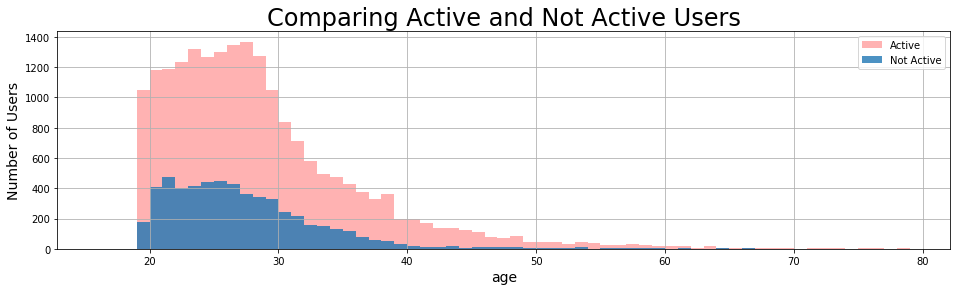

age active users: 26.875729185
age not active users: 28.616005179




In [15]:
plt.title('Comparing Active and Not Active Users',fontsize=24) 
plot_feature('age', bins=range(16,80))

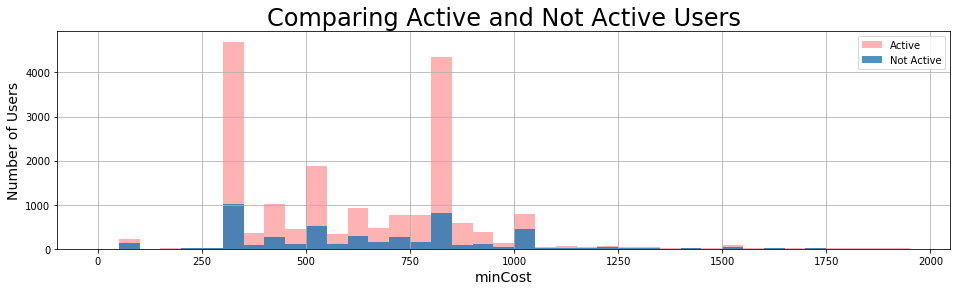

minCost active users: 636.288998358
minCost not active users: 636.757386424




In [37]:
plt.title('Comparing Active and Not Active Users',fontsize=24) 
plot_feature('minCost',bins=range(0,2000, 50))

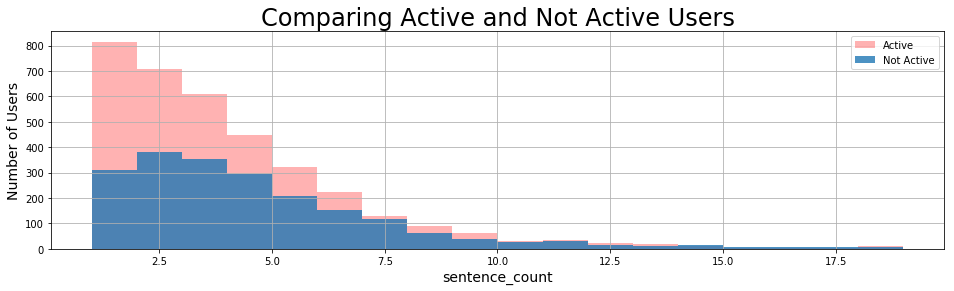

sentence_count active users: 1.610747746
sentence_count not active users: 0.661919227




In [34]:
plt.title('Comparing Active and Not Active Users',fontsize=24) 
plot_feature('sentence_count', bins=range(1,20,1))

## Has About

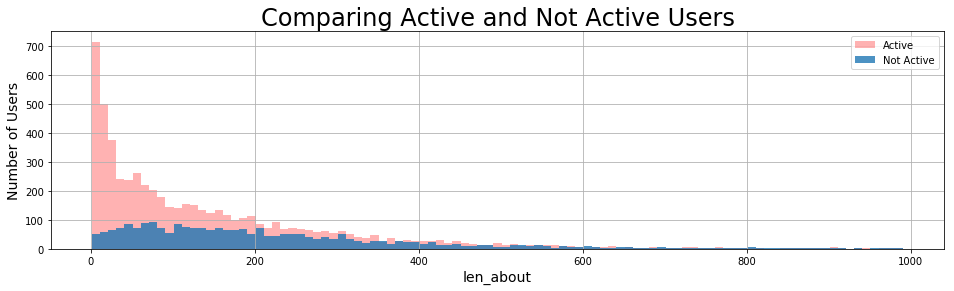

len_about active users: 108.423369277
len_about not active users: 45.760270903




In [14]:
plt.title('Comparing Active and Not Active Users',fontsize=24) 
plot_feature('len_about',range(1,1000,10))

In [ ]:
mp.json_it(user_df,'data_user_active')